Updating data..........

# MULTI-PERIOD OPTIMIZATION
 
#################################################################
Universe size                                                  11
Initial timestamp                       2020-01-02 14:30:00+00:00
Final timestamp                         2024-03-19 13:30:00+00:00
Number of periods                                            1060
Initial value (USDOLLAR)                                1.000e+06
Final value (USDOLLAR)                                  3.129e+06
Profit (USDOLLAR)                                       2.129e+06
                                                                 
Avg. return (annualized)                                    33.0%
Volatility (annualized)                                     34.3%
Avg. excess return (annualized)                             31.1%
Avg. active return (annualized)                             31.1%
Excess volatility (annualized)                              34.4%
Active volatility (an

/Users/edkwang/.pyenv/versions/3.12.2/envs/rsch/lib/python3.12/site-packages/cvxportfolio/result.py:862: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # pragma: no cover
/Users/edkwang/.pyenv/versions/3.12.2/envs/rsch/lib/python3.12/site-packages/cvxportfolio/result.py:862: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # pragma: no cover


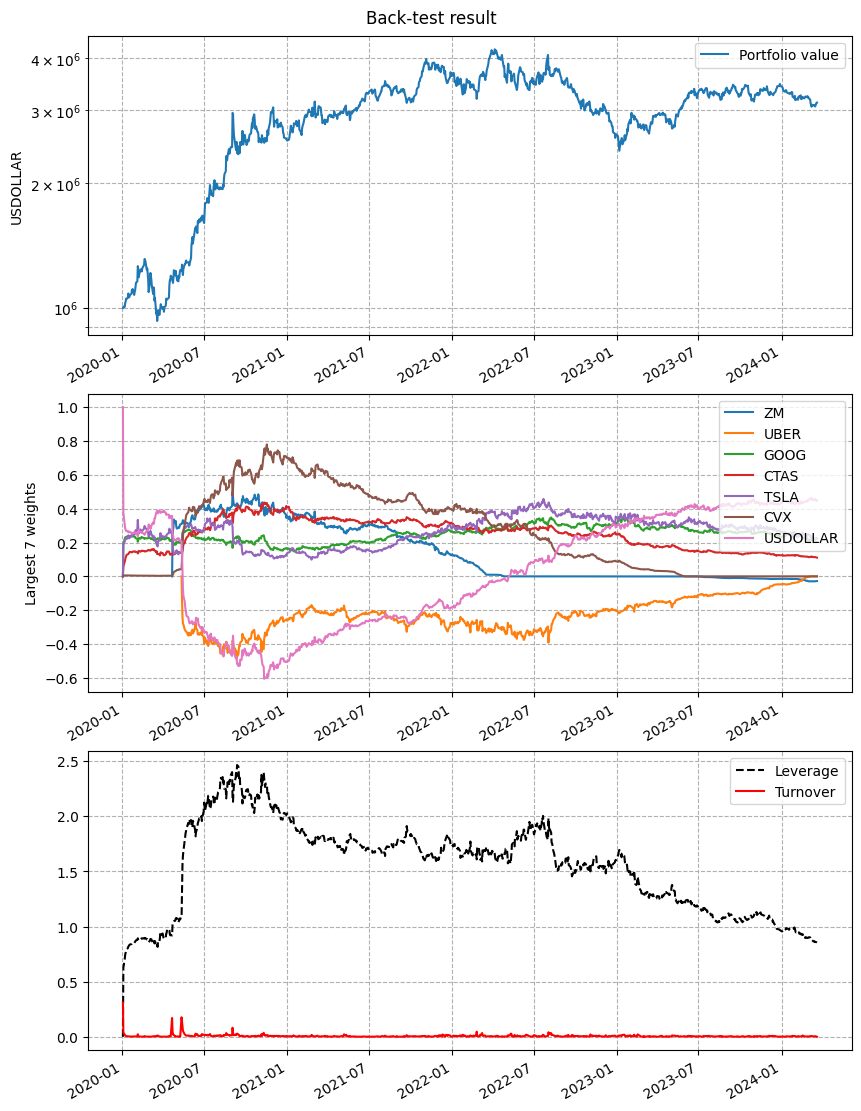

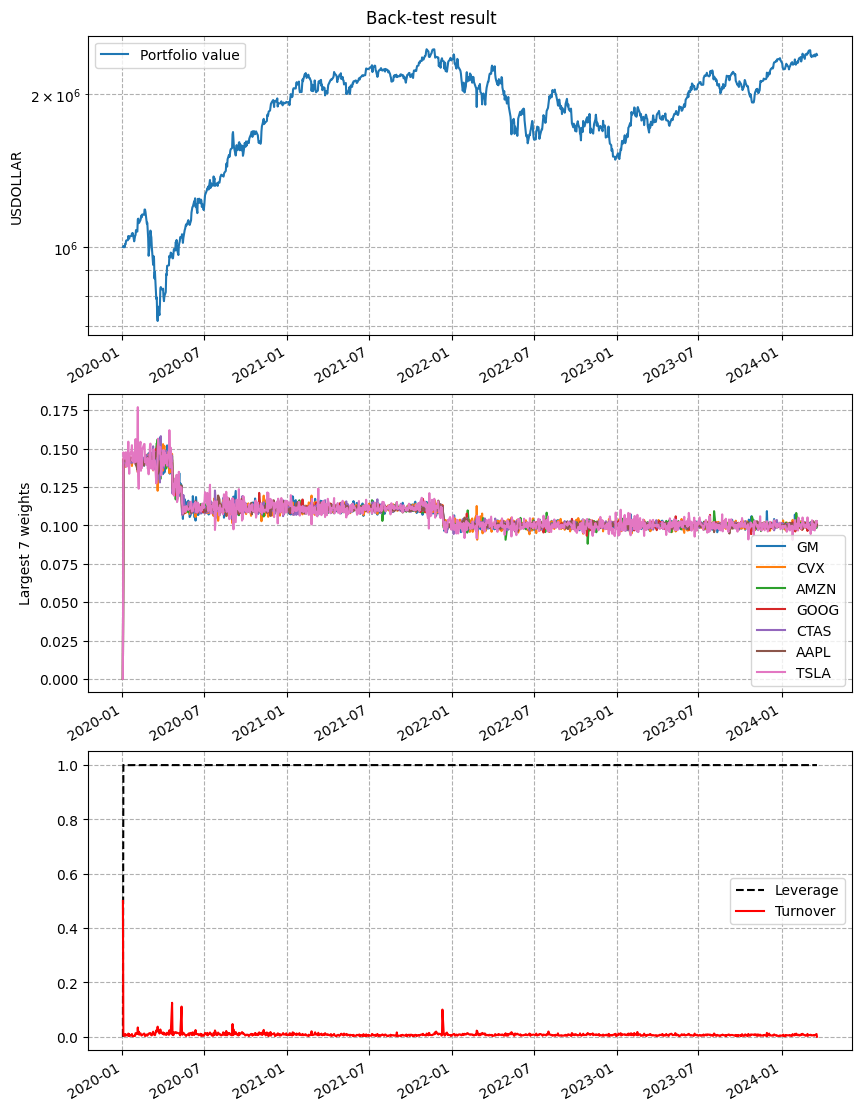

In [3]:
import os
import matplotlib.pyplot as plt
import cvxportfolio as cvx

# risk aversion parameter (Chapter 4.2)
# chosen to match resulting volatility with the
# uniform portfolio (for illustrative purpose)
gamma = 2.5

# covariance forecast error risk parameter (Chapter 4.3)
# this can help regularize a noisy covariance estimate
kappa = 0.05

objective = cvx.ReturnsForecast() - gamma * (
	cvx.FullCovariance() + kappa * cvx.RiskForecastError()
) - cvx.StocksTransactionCost()

constraints = [cvx.LeverageLimit(3)]

policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=2)

simulator = cvx.StockMarketSimulator(
    ['AAPL', 'AMZN', 'UBER', 'ZM', 'CVX', 'TSLA', 'GM', 'ABNB', 'CTAS', 'GOOG'])

results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2020-01-01')

# print statistics result of the backtest
print("\n# MULTI-PERIOD OPTIMIZATION\n", results[0])
print("\n# UNIFORM ALLOCATION:\n", results[1])

# plot value and weights of the portfolio in time for MPO
results[0].plot()

# we use this to save the plots for the documentation
if 'CVXPORTFOLIO_SAVE_PLOTS' in os.environ:
    plt.savefig('hello_world.png')

# plot value and weights of the portfolio in time for uniform
results[1].plot()

if 'CVXPORTFOLIO_SAVE_PLOTS' in os.environ:
    plt.savefig('hello_world_uniform.png')
else:
    plt.show()